# Understandig and classifying credit risk
## German Credit Data

When a bank receives a loan application it is crutial that bank makes a decision whether to approve the loan or not. To do this, banks pay a close attention to the applicant's profile. 

There are two types of risks involved here: First is that if the applicant has a good credit risk, meaning he/she is likely to repay the loan, then not approving his/her loan application bank will loose a business and a good customer. Secondly, if the applicant has a bad credit risk, meaning he/she is not likely to repay the loan, then approving that application reaults a financial loss for the bank. 

Hence the bank needs to have a decision rule to decide whether to grant the approval for the loan or not. An applicant's demorgraphic and socio-economic profiles are considered by loan managers before a decision is made.
Data is available at UCI Machine Learning Repository. Link is https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

### Objective:
- To understand what factors contribute most to good or bad credit risk.
- To perform clustering to find any meanningful patterns of loan applicants.
- To create a model that predicts the likelihood if a certain loan applicant has a good credit risk or not.

The implementation of this model will allow loan managers to make better decisions on loan applications.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
column_names = ["status", "duration in month", "credit history", "purpose", "credit amount",
                "savings account/bonds", "present employment", "Installment rate in percentage of disposable income",
                "Personal status and sex", "Other debtors / guarantors", "Present residence since", "Property",
                "Age in years", "Other installment plans", "Housing", "Number of existing credits at this bank",
                "Job", "Number of people being liable to provide maintenance for", "Telephone", " foreign worker", "Risk"]

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data", sep = ' ', names = column_names)                        

In [4]:
df.head().T

,0,1,2,3,4
status,A11,A12,A14,A11,A11
duration in month,6,48,12,42,24
credit history,A34,A32,A34,A32,A33
purpose,A43,A43,A46,A42,A40
credit amount,1169,5951,2096,7882,4870
savings account/bonds,A65,A61,A61,A61,A61
present employment,A75,A73,A74,A74,A73
Installment rate in percentage of disposable income,4,2,2,2,3
Personal status and sex,A93,A92,A93,A93,A93
Other debtors / guarantors,A101,A101,A101,A103,A101


In [5]:
df.shape

(1000, 21)

In [6]:
df['status'] = df['status'].map({'A11': '< 0 DM', 'A12' : '0 <= . <  200 DM', 'A13' : '>= 200 DM', 
                                 'A14' : 'no checking account'})
df['credit history'] = df['credit history'].map({'A30' : 'no credits taken/all credits paid back duly', 
                                           'A31' : 'all credits at this bank paid back duly',
                                           'A32' : 'existing credits paid back duly till now',
                                           'A33' : 'delay in paying off in the past',
                                           'A34' : 'critical account/other credits existing (not at this bank)'})
df['purpose'] = df['purpose'].map({'A40' : 'car(new)', 'A41' : 'car(used)', 'A42' : 'furniture/equipment',
                                   'A43' : 'radio/television', 'A44' : 'domestic appliances', 'A45' : 'repairs',
                                   'A46' : 'education', 'A47' : 'vacation', 'A48' : 'retraining', 'A49' : 'business',
                                   'A410' : 'others'})
df['savings account/bonds'] =df['savings account/bonds'].map({'A61' :'<100 DM', 'A62' : '100<=.<500 DM',
                                                       'A63' :'500 <=.< 1000 DM', 'A64' : '>= 1000 DM',
                                                       'A65' :'unknown/ no savings account'})
df['present employment'] = df['present employment'].map({'A71' : 'unemployed',
                                                         'A72' : '< 1 year',
                                                         'A73' : '1<=.<4 years',  
                                                         'A74' : '4<=.<7 years',
                                                         'A75' : '>= 7 years'})
df['Sex'] =df['Personal status and sex'].map(lambda x: 'male' if x in ['A91', 'A93', 'A94'] else 'female')
df['Other debtors / guarantors'] = df['Other debtors / guarantors'].map({'A101' : 'none', 'A102' : 'co-applicant',
                                                                         'A103' : 'guarantor'})
df['Property'] = df['Property'].map({'A121' : 'real estate',
                                     'A122' : 'if not real estate : building society savings agreement/life insurance', 
                                     'A123' : 'if not real estate/building society savings agreement, car or other',
                                     'A124' : 'unknown / no property'})
df['Other installment plans'] = df['Other installment plans'].map({'A141' : 'bank', 'A142' : 'stores', 'A143' : 'none'})
df['Housing'] = df['Housing'].map({'A151' : 'rent', 'A152' : 'own', 'A153' : 'for free'})
df['Job'] = df['Job'].map({'A171' : 'unemployed/ unskilled  - non-resident', 'A172' : 'unskilled - resident',
                           'A173' : 'skilled employee / official', 
                           'A174' : 'management/ self-employed/highly qualified employee/ officer'})
df['Telephone'] = df['Telephone'].map({'A191' : 'none', 'A192' : 'yes, registered under the customers name'})
df['Risk'] = df['Risk'].map({1: 'good', 2: 'bad'})

df[' foreign worker'] = df[' foreign worker'].map({'A201' : "yes", 'A202' : "no"})


In [7]:
df.head().T

,0,1,2,3,4
status,< 0 DM,0 <= . < 200 DM,no checking account,< 0 DM,< 0 DM
duration in month,6,48,12,42,24
credit history,critical account/other credits existing (not a...,existing credits paid back duly till now,critical account/other credits existing (not a...,existing credits paid back duly till now,delay in paying off in the past
purpose,radio/television,radio/television,education,furniture/equipment,car(new)
credit amount,1169,5951,2096,7882,4870
savings account/bonds,unknown/ no savings account,<100 DM,<100 DM,<100 DM,<100 DM
present employment,>= 7 years,1<=.<4 years,4<=.<7 years,4<=.<7 years,1<=.<4 years
Installment rate in percentage of disposable income,4,2,2,2,3
Personal status and sex,A93,A92,A93,A93,A93
Other debtors / guarantors,none,none,none,guarantor,none


In this dataset, we have seven numerical variables and thirteen categorical variables. I decided to remove some of the variable since I believe they are not relevant to this study.

### Removed variables:
- Personal status
- Property
- Telephone
- foreign worker

In [8]:
df = df.drop(['Personal status and sex', 'Property', 'Telephone', ' foreign worker'], axis = 1)

In [9]:
#check for missing values
df.isnull().any()

status                                                      False
duration in month                                           False
credit history                                              False
purpose                                                     False
credit amount                                               False
savings account/bonds                                       False
present employment                                          False
Installment rate in percentage of disposable income         False
Other debtors / guarantors                                  False
Present residence since                                     False
Age in years                                                False
Other installment plans                                     False
Housing                                                     False
Number of existing credits at this bank                     False
Job                                                         False
Number of 

In [10]:
#Renaming certain columns for better readability
df = df.rename(columns={'duration in month': 'duration', 'credit history': 'credit_hist', 'credit amount': 'credit_amount',
                       'Installment rate in percentage of disposable income' : 'installment_rate',
                       'Age in years' : 'Age',
                       'Number of people being liable to provide maintenance for' : 'dependents'})
df.head(3).T

,0,1,2
status,< 0 DM,0 <= . < 200 DM,no checking account
duration,6,48,12
credit_hist,critical account/other credits existing (not a...,existing credits paid back duly till now,critical account/other credits existing (not a...
purpose,radio/television,radio/television,education
credit_amount,1169,5951,2096
savings account/bonds,unknown/ no savings account,<100 DM,<100 DM
present employment,>= 7 years,1<=.<4 years,4<=.<7 years
installment_rate,4,2,2
Other debtors / guarantors,none,none,none
Present residence since,4,2,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   status                                   1000 non-null   object
 1   duration                                 1000 non-null   int64 
 2   credit_hist                              1000 non-null   object
 3   purpose                                  1000 non-null   object
 4   credit_amount                            1000 non-null   int64 
 5   savings account/bonds                    1000 non-null   object
 6   present employment                       1000 non-null   object
 7   installment_rate                         1000 non-null   int64 
 8   Other debtors / guarantors               1000 non-null   object
 9   Present residence since                  1000 non-null   int64 
 10  Age                                      1000 non-null   int6

In [12]:
#check the type of attibutes
df.dtypes

status                                     object
duration                                    int64
credit_hist                                object
purpose                                    object
credit_amount                               int64
savings account/bonds                      object
present employment                         object
installment_rate                            int64
Other debtors / guarantors                 object
Present residence since                     int64
Age                                         int64
Other installment plans                    object
Housing                                    object
Number of existing credits at this bank     int64
Job                                        object
dependents                                  int64
Risk                                       object
Sex                                        object
dtype: object

# Exploratory Data Analysis
***

In [13]:
# How many loan applications are in the dataset?
df.shape

(1000, 18)

In [14]:
# what is the rate of risk in the dataset?
risk_rate = df.Risk.value_counts()/1000
risk_rate

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [15]:
df.describe()

,duration,credit_amount,installment_rate,Present residence since,Age,Number of existing credits at this bank,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [16]:
df.astype('object').describe().T

,count,unique,top,freq
status,1000,4,no checking account,394
duration,1000,33,24,184
credit_hist,1000,5,existing credits paid back duly till now,530
purpose,1000,10,radio/television,280
credit_amount,1000,921,1478,3
savings account/bonds,1000,5,<100 DM,603
present employment,1000,5,1<=.<4 years,339
installment_rate,1000,4,4,476
Other debtors / guarantors,1000,3,none,907
Present residence since,1000,4,4,413


In [17]:
# mean smmary of applicants (good risk vs bad risk) 
risk_summary = df.groupby('Risk')
risk_summary.mean()

,duration,credit_amount,installment_rate,Present residence since,Age,Number of existing credits at this bank,dependents
Risk,,,,,,,
bad,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333
good,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714


The loan applications with bad risk have asked for higher duration in average, and have a higher credit amount in average  compared to applications with good risk. Average installment rate is also higher in applications with bad risk. Average age and average number of existing credits is higher in applications with good risk.

It seems "present residence since" and "dependents" variables doesn't differ much within the two groups. For each variable, we can use hypothesis testing to test if there is any difference or not within these two risk groups.

### Numerical variables 

'Duration' and 'Age' are discrete variables and 'credit_amount' is a continuous variable. However, since there appears to be many distinct values in these variable, they are being analyzed together.

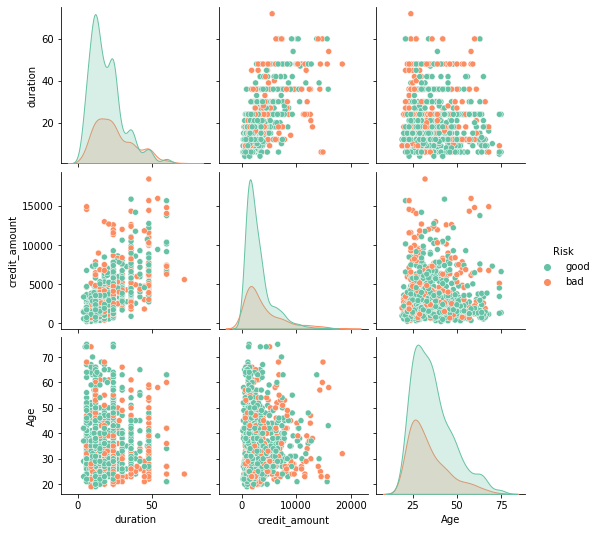

In [18]:
g = sns.pairplot(df[['duration', 'credit_amount','Age', 'Risk']], hue="Risk", palette="Set2", diag_kind="kde", height=2.5)

Duration, credit_amount, and Age distributions are positively skewed distributions regardless of the type of risk. When looking at credit_amount and duration ,there seem to be a positive correlation meaning as the duration increases, creit amount also increases.

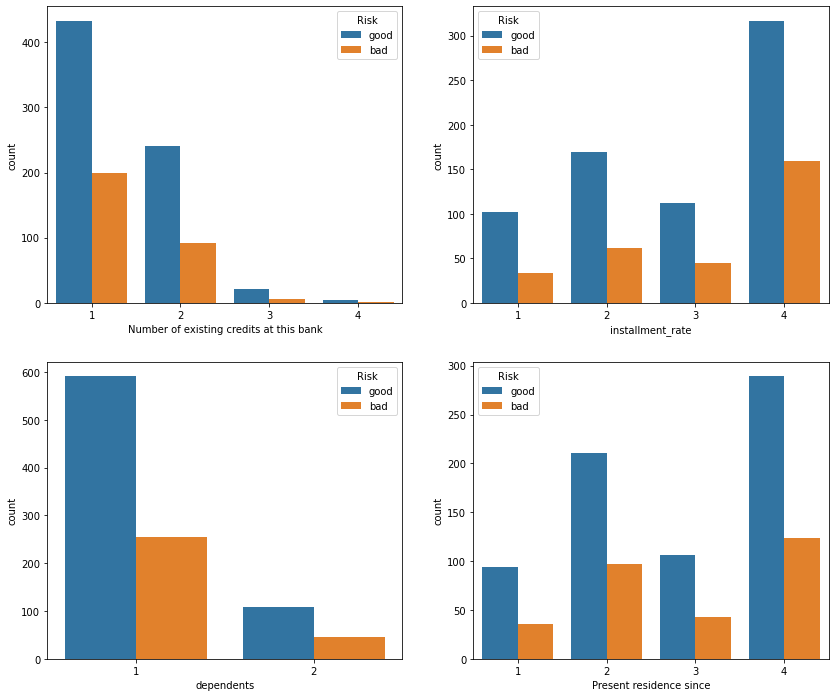

In [19]:
fig = plt.figure(figsize=(14,12))

plt.subplot(2,2,1)
sns.countplot(data = df, x="Number of existing credits at this bank", hue ="Risk")

plt.subplot(2,2,2)
sns.countplot(data = df, x="installment_rate", hue ="Risk")

plt.subplot(2,2,3)
sns.countplot(data = df, x="dependents", hue ="Risk")

plt.subplot(2,2,4)
sns.countplot(data = df, x="Present residence since", hue ="Risk")
plt.show()

Since these variables have at most four distinct values, there are plotted together to see if any patterns are visible. It seems all these distributions follow the same pattern regardless of the risk they have. 

### Categorical variables

In [20]:
good = df[df['Risk']== "good"]
bad = df[df['Risk']=="bad"]

good['status'].value_counts(normalize = True)

no checking account    0.497143
0 <= . <  200 DM       0.234286
< 0 DM                 0.198571
>= 200 DM              0.070000
Name: status, dtype: float64

In [21]:
bad.shape

(300, 18)

In [22]:
bad['status'].value_counts(normalize = True)

< 0 DM                 0.450000
0 <= . <  200 DM       0.350000
no checking account    0.153333
>= 200 DM              0.046667
Name: status, dtype: float64

In [23]:
good['savings account/bonds'].value_counts(normalize = True)

<100 DM                        0.551429
unknown/ no savings account    0.215714
100<=.<500 DM                  0.098571
500 <=.< 1000 DM               0.074286
>= 1000 DM                     0.060000
Name: savings account/bonds, dtype: float64

In [24]:
bad['savings account/bonds'].value_counts(normalize = True)

<100 DM                        0.723333
100<=.<500 DM                  0.113333
unknown/ no savings account    0.106667
500 <=.< 1000 DM               0.036667
>= 1000 DM                     0.020000
Name: savings account/bonds, dtype: float64

In [25]:
pd.crosstab(bad['status'], bad['savings account/bonds'], margins = True)

savings account/bonds,100<=.<500 DM,500 <=.< 1000 DM,<100 DM,>= 1000 DM,unknown/ no savings account,All
status,,,,,,
0 <= . < 200 DM,24,3,67,4,7,105
< 0 DM,5,2,114,0,14,135
>= 200 DM,1,1,10,0,2,14
no checking account,4,5,26,2,9,46
All,34,11,217,6,32,300


In [26]:
pd.crosstab(good['status'], good['savings account/bonds'], margins = True)

savings account/bonds,100<=.<500 DM,500 <=.< 1000 DM,<100 DM,>= 1000 DM,unknown/ no savings account,All
status,,,,,,
0 <= . < 200 DM,23,8,85,10,38,164
< 0 DM,7,6,105,6,15,139
>= 200 DM,4,3,31,3,8,49
no checking account,35,35,165,23,90,348
All,69,52,386,42,151,700


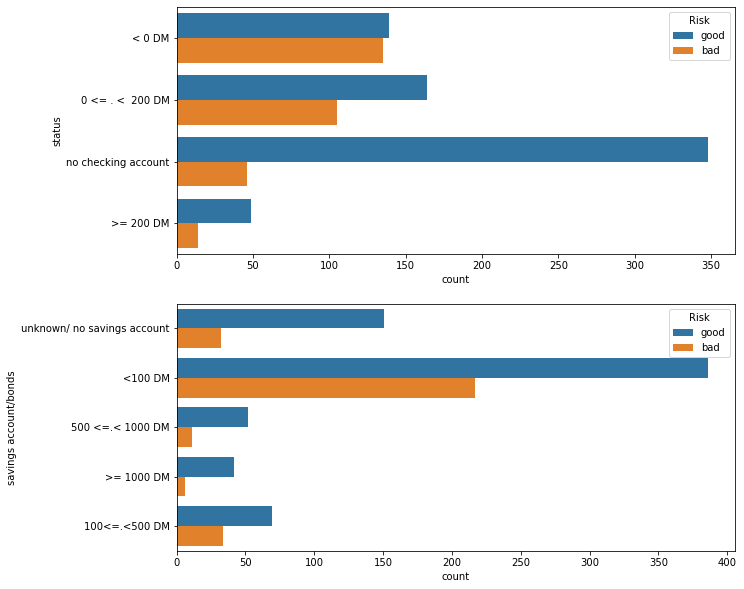

In [27]:
fig = plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.countplot(y = 'status', data = df, hue = 'Risk')

plt.subplot(2,1,2)
sns.countplot(y = 'savings account/bonds', data = df, hue = 'Risk')
plt.show()

<AxesSubplot:xlabel='count', ylabel='Other debtors / guarantors'>

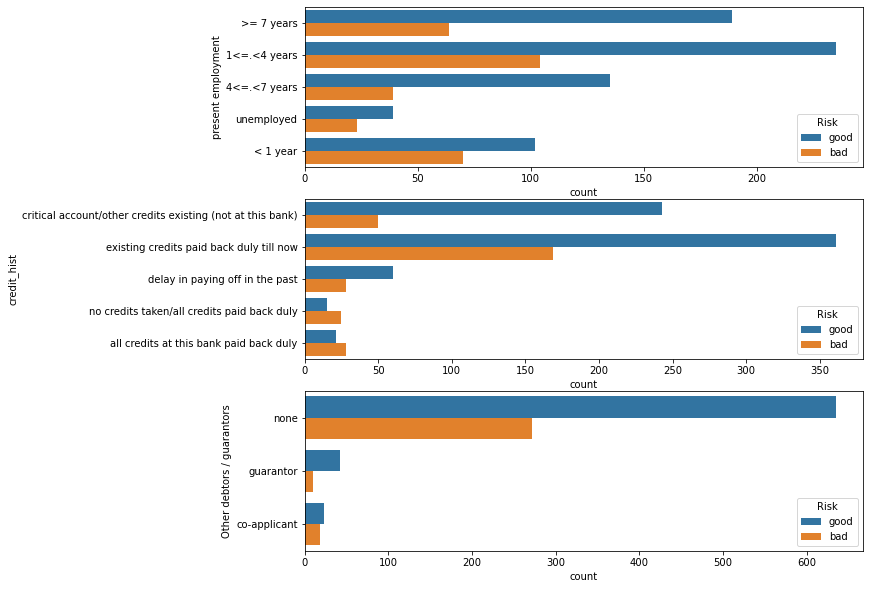

In [28]:
fig = plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.countplot(y = 'present employment', data = df, hue = 'Risk')

plt.subplot(3,1,2)
sns.countplot(y = 'credit_hist', data = df, hue = 'Risk')

plt.subplot(3,1,3)
sns.countplot(y = 'Other debtors / guarantors', data = df, hue = 'Risk')


<AxesSubplot:xlabel='count', ylabel='Sex'>

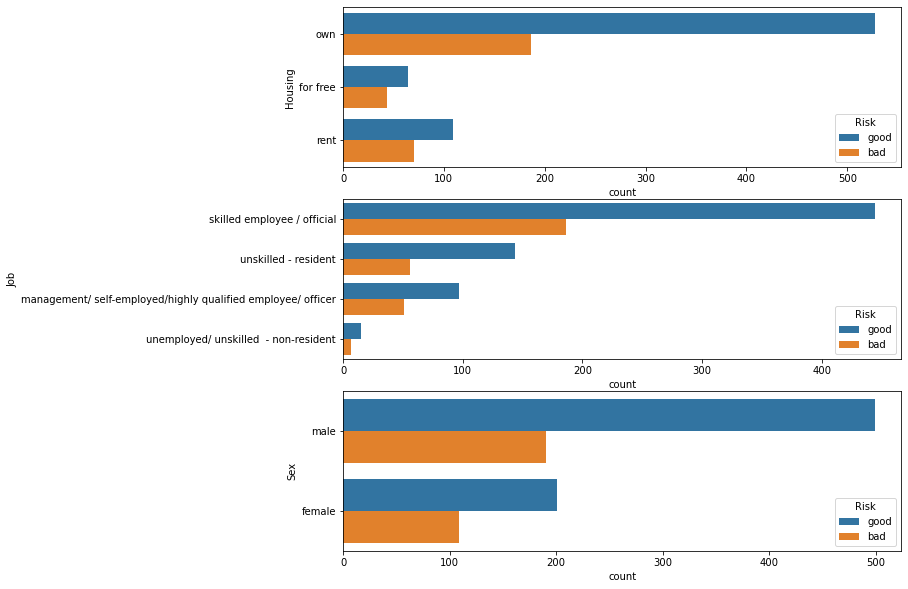

In [29]:
fig = plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.countplot(y = 'Housing', data = df, hue = 'Risk')

plt.subplot(3,1,2)
sns.countplot(y = 'Job', data = df, hue = 'Risk')

plt.subplot(3,1,3)
sns.countplot(y = 'Sex', data = df, hue = 'Risk')

Now the question is how a particular applicant become a good risk or bad. What factors affct the most in deciding this!

Observing the distribution patterns of duration, credit amount, and age, we cannot find any significant patterns in good and bad risk loan applications. They are pretty much shuffled together, no fine lines can be seen separating the two types of risks. 

Number of existing credits in the bank means the total number of funds a person or business can borrow from the bank. Most of the applicatnts here have only one and highest number of credits is four. There are many loan applicants with one credit and good credit risk. As the number of credits increases from one to four, difference in counts of good and bad risk decreases.

### Credit amount VS Duration

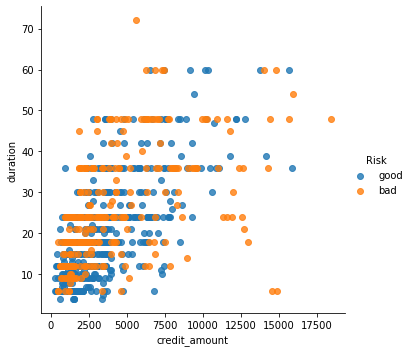

In [30]:
sns.lmplot(x='credit_amount', y = 'duration', data = df, fit_reg = False, hue='Risk')

### Loan Duration

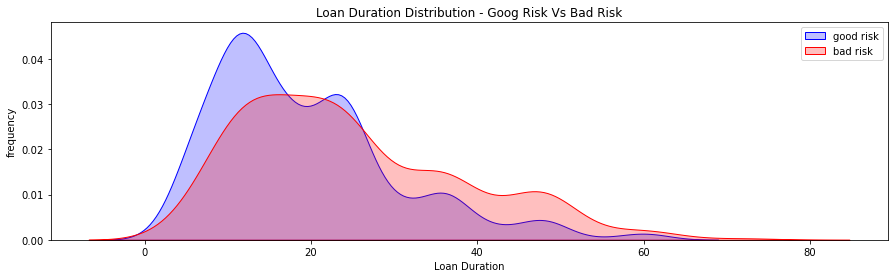

In [31]:
#KDEPLot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax = sns.kdeplot(df.loc[(df['Risk']=='good'), 'duration'], color ='b', shade = True, label = 'good risk')
ax = sns.kdeplot(df.loc[(df['Risk']=='bad'), 'duration'], color ='r', shade = True, label = 'bad risk')
ax.set(xlabel = "Loan Duration", ylabel = "frequency")
ax.legend(ncol = 1, loc = 'upper right', frameon = True)
plt.title("Loan Duration Distribution - Goog Risk Vs Bad Risk")
plt.show()

Duration is a multi-modal distribution. Applications with loan duration around 10 months has a good reputation, again applications with loan duration close to 25 and 35 months also has a good risk.

### Credit history 

In [32]:
good_risk = df[df['Risk']=='good']

good_risk = pd.DataFrame(good_risk.credit_hist.value_counts()).reset_index()
bad_risk = pd.DataFrame(df.credit_hist.value_counts()).reset_index()

risk_merge = pd.merge(good_risk, bad_risk, how = 'inner', on ='index')

risk_merge = risk_merge.rename(columns={'credit_hist_x': 'good', "credit_hist_y": 'bad', 'index':'credit_hist'})
pd.set_option('max_colwidth', 800)

risk_merge

,credit_hist,good,bad
0,existing credits paid back duly till now,361,530
1,critical account/other credits existing (not at this bank),243,293
2,delay in paying off in the past,60,88
3,all credits at this bank paid back duly,21,49
4,no credits taken/all credits paid back duly,15,40


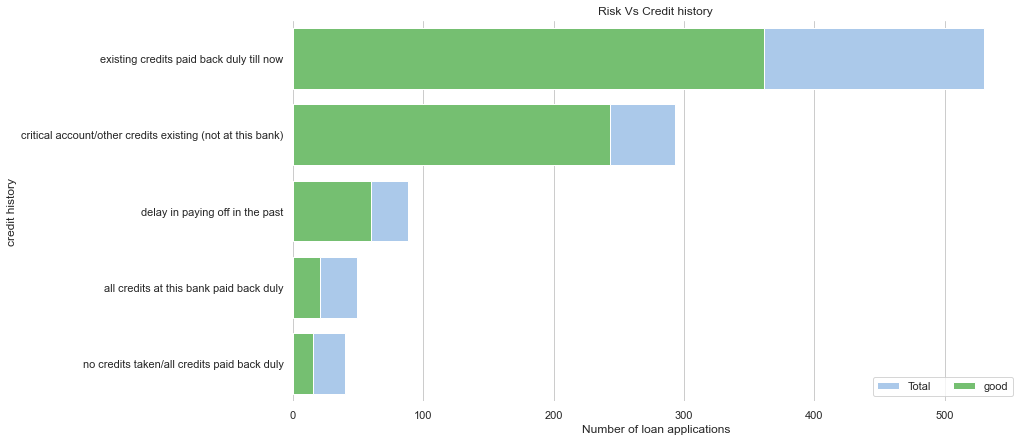

In [33]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize=(13,7))


sns.set_color_codes('pastel')
sns.barplot(x='bad', y = 'credit_hist', data = risk_merge, label='Total', color ='b')

sns.set_color_codes('muted')
sns.barplot(x='good', y = 'credit_hist', data = risk_merge, label='good', color ='g')

ax.legend(ncol=2, loc='lower right', frameon = True)
ax.set(ylabel='credit history', title = 'Risk Vs Credit history', xlabel = 'Number of loan applications')
sns.despine(left=True, bottom = True)

In [34]:
good_risk = df[df['Risk']=='good']

good_risk = pd.DataFrame(good_risk.purpose.value_counts()).reset_index()
bad_risk = pd.DataFrame(df.purpose.value_counts()).reset_index()

risk_merge = pd.merge(good_risk, bad_risk, how = 'inner', on ='index')

risk_merge = risk_merge.rename(columns={'purpose_x': 'good', "purpose_y": 'bad', 'index':'purpose'})
pd.set_option('max_colwidth', 800)

risk_merge

,purpose,good,bad
0,radio/television,218,280
1,car(new),145,234
2,furniture/equipment,123,181
3,car(used),86,103
4,business,63,97
5,education,28,50
6,repairs,14,22
7,domestic appliances,8,12
8,retraining,8,9
9,others,7,12


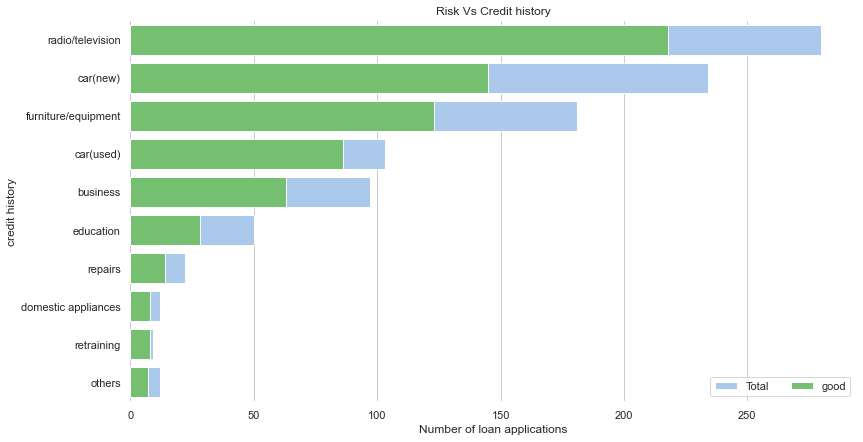

In [35]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize=(13,7))


sns.set_color_codes('pastel')
sns.barplot(x='bad', y = 'purpose', data = risk_merge, label='Total', color ='b')

sns.set_color_codes('muted')
sns.barplot(x='good', y = 'purpose', data = risk_merge, label='good', color ='g')

ax.legend(ncol=2, loc='lower right', frameon = True)
ax.set(ylabel='credit history', title = 'Risk Vs Credit history', xlabel = 'Number of loan applications')
sns.despine(left=True, bottom = True)

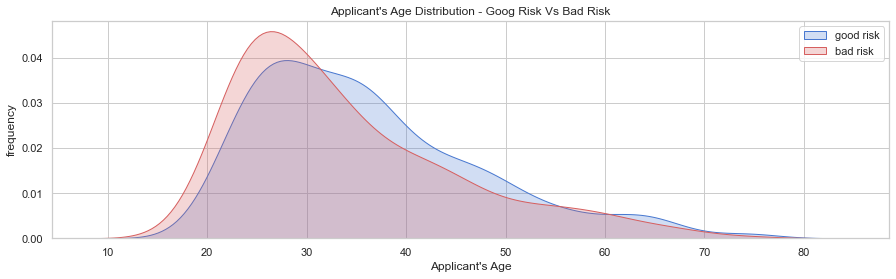

In [36]:
fig = plt.figure(figsize=(15,4))
ax = sns.kdeplot(df.loc[(df['Risk']=='good'), 'Age'], color ='b', shade = True, label = 'good risk')
ax = sns.kdeplot(df.loc[(df['Risk']=='bad'), 'Age'], color ='r', shade = True, label = 'bad risk')
ax.set(xlabel = "Applicant's Age", ylabel = "frequency")
ax.legend(ncol = 1, loc = 'upper right', frameon = True)
plt.title("Applicant's Age Distribution - Goog Risk Vs Bad Risk")
plt.show()

Applicants with age between 10 and 31(roughly) tend to have bad risk than good. Between ages 31 to 55, appplicants are more likely to be good risk than bad. After the age of 55, it is not easy to differentiate whether a particular loan applicant is good or bad.

# Data Pre-processing
***

We have ten categorical variables and seven numerical variables. They need to be encoded before feeding into machine learning models. There are couple of ways to encode categorical variables. Few of them are, 

- Ordinal Encoding: convert string labels to integer values
- OneHot Encoding: One column for each entry
- Binary Encoding: convert each integer to binary digits. Each binary digit gets one column.

As status, savings account/bonds, present employment variables are ordinal, I encode them manually (didn't use ordinal encoding because it doesn't assign the values the way I want: it assigns one to first unique value in the column, 2 to the second unique value)

The variables Housing, other debtors/guarantors, other installment plans were encoded as 1 or 0. For Example, if the applicant owns a house 1, if not 0.

For the other categorical variables, I use OneHot encoding. This could be used to all the categorical variables as well. The pandas GetDummies or scikit-learn's OneHotEncoder can be used for this. I use Pandas GetDummies here.

In [37]:
#keeping the original dataset as it is 
df1 = df[['status', 'duration', 'credit_hist', 'purpose', 'credit_amount',
       'savings account/bonds', 'present employment', 'installment_rate',
       'Other debtors / guarantors', 'Present residence since', 'Age',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job', 'dependents', 'Risk',
       'Sex']]

In [38]:
status_mapper = {'no checking account':1, '< 0 DM': 2, '0 <= . <  200 DM': 3, '>= 200 DM': 4}
df["status_new"] = df["status"].replace(status_mapper)

savings_mapper = {'unknown/ no savings account': 1, '<100 DM':2, '100<=.<500 DM':3,
                  '500 <=.< 1000 DM':4, '>= 1000 DM':5}
df["savings_new"] = df["savings account/bonds"].replace(savings_mapper)

employment_mapper = {'unemployed':1, '< 1 year':2, '1<=.<4 years':3, '4<=.<7 years':4, '>= 7 years':5}
df["employment_new"] = df["present employment"].replace(employment_mapper)

debtors_mapper = {'none':0, 'co-applicant':1, 'guarantor':1 }
df["debtors_new"] = df["Other debtors / guarantors"].replace(debtors_mapper)

other_plans_mapper = {'bank':1, 'stores':1, 'none':0}
df["other_plans"] = df["Other installment plans"].replace(other_plans_mapper)

housing_mapper = {'rent':0 , 'own':1 , 'for free':0}
df["Housing_new"] = df["Housing"].replace(housing_mapper)

risk_mapper = {'good':1, 'bad':0}
df["risk"] = df["Risk"].replace(risk_mapper)


df = df.drop(columns=["status", "savings account/bonds", "present employment",
                 "Other debtors / guarantors", "Other installment plans", "Housing", 'Risk'  ], axis =1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   duration                                 1000 non-null   int64 
 1   credit_hist                              1000 non-null   object
 2   purpose                                  1000 non-null   object
 3   credit_amount                            1000 non-null   int64 
 4   installment_rate                         1000 non-null   int64 
 5   Present residence since                  1000 non-null   int64 
 6   Age                                      1000 non-null   int64 
 7   Number of existing credits at this bank  1000 non-null   int64 
 8   Job                                      1000 non-null   object
 9   dependents                               1000 non-null   int64 
 10  Sex                                      1000 non-null   obje

In [39]:
cat = ['credit_hist', 'purpose', 'Job', 'Sex']
other = ['duration', 'credit_amount',  'installment_rate', 'Present residence since', 'Age', 
        'Number of existing credits at this bank', 'dependents', 'status_new', 'savings_new', 'employment_new',
        'debtors_new', 'other_plans', 'Housing_new', 'risk']

categorical_df = pd.get_dummies(df[cat], drop_first = True)
other_df = df[other]

new_df = pd.concat([categorical_df, other_df], axis =1)

new_df.head().T

,0,1,2,3,4
credit_hist_critical account/other credits existing (not at this bank),1,0,1,0,0
credit_hist_delay in paying off in the past,0,0,0,0,1
credit_hist_existing credits paid back duly till now,0,1,0,1,0
credit_hist_no credits taken/all credits paid back duly,0,0,0,0,0
purpose_car(new),0,0,0,0,1
purpose_car(used),0,0,0,0,0
purpose_domestic appliances,0,0,0,0,0
purpose_education,0,0,1,0,0
purpose_furniture/equipment,0,0,0,1,0
purpose_others,0,0,0,0,0


In [40]:
new_df.shape

(1000, 31)

# Imbalance data

In [41]:
new_df.risk.value_counts(1)

1    0.7
0    0.3
Name: risk, dtype: float64

70% of the loan applications are good risk, while 30% are bad.

There are many approaches to handle imbalance data. Few popular ones among them are,

- Random Under-Sampling: randomly eliminates majority class instances
- Random Over-Sampling: increases the number of instances in the minority class by randomly replicating them
- Cluster-Based Over Sampling: K-means clustering algorithm is independently applied to minority and majority class instances. Each cluster is oversampled such that all classes have the same size.

- Synthetic Minority Oversampling Algorithm (SMOTE): A subset of data from minority class is taken and then new synthetic similar instances are added to the original dataset.
- Modified synthetic minority oversampling technique (MSMOTE)

I will focus on only random under-sampling, random over-sampling, and SMOTE here.

# Split Train/Test Set
***

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

X = new_df.drop('risk', axis =1)
y = new_df['risk']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123, stratify=y)

In [43]:
X_train.shape

(700, 30)

In [44]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# upsample minority classs
X_train_over, y_train_over = resample(X_train[y_train ==0], 
                                 y_train[y_train ==0],
                                 replace = True,
                                 n_samples = X_train[y_train==1].shape[0],
                                 random_state =123) 
X_train_over = np.concatenate((X_train[y_train==1], X_train_over))
y_train_over = np.concatenate((y_train[y_train==1], y_train_over))

# downsample majority class
X_train_under, y_train_under = resample(X_train[y_train ==1], 
                                 y_train[y_train ==1],
                                 replace = True,
                                 n_samples = X_train[y_train==0].shape[0],
                                 random_state =123) 
X_train_under = np.concatenate((X_train[y_train==0], X_train_under))
y_train_under = np.concatenate((y_train[y_train==0], y_train_under))

# using SMOTE
s = SMOTE(random_state =123)
X_train_s, y_train_s = s.fit_sample(X_train, y_train)

print('Original shape:', X_train.shape, y_train.shape)
print('Oversampled shape:', X_train_over.shape, y_train_over.shape)
print('Undersampled shape:', X_train_under.shape, y_train_under.shape)
print('SMOTE sample shape:', X_train_s.shape, y_train_s.shape)



Original shape: (700, 30) (700,)
Oversampled shape: (980, 30) (980,)
Undersampled shape: (420, 30) (420,)
SMOTE sample shape: (980, 30) (980,)


# Modeling
***

Three machine learning models are used here:

    1. Logistic Regression
    2. Random Forest Classifier
    3. Gradient Boosting Classifier
    
Logistic regression is used as the baseline model to decide which sampling technique give the best results. 

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


#lr = LogisticRegression(max_iter =1000)


pipe = make_pipeline(StandardScaler(), LogisticRegression())
# apply scaling on training data
lr = pipe.fit(X_train, y_train)  
print("-----Logistic Regression Model with Original data-----")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print("Logistic Regression AUC = ", lr_auc)
print(classification_report(y_test, lr.predict(X_test)))


# Logistic Regression with SMOTE
lr = pipe.fit(X_train_s, y_train_s)
print("-----Logistic Regression Model with SMOTE-----")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print("Logistic Regression AUC = ", lr_auc)
print(classification_report(y_test, lr.predict(X_test)))

# Logistic REgression with Under-sampling
lr = pipe.fit(X_train_under, y_train_under)
print("-----Logistic Regression Model with Under-sampling-----")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print("Logistic Regression AUC = ", lr_auc)
print(classification_report(y_test, lr.predict(X_test)))

# Logistic REgression with Over-sampling
lr = pipe.fit(X_train_over, y_train_over)
print("-----Logistic Regression Model with Over-sampling-----")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print("Logistic Regression AUC = ", lr_auc)
print(classification_report(y_test, lr.predict(X_test)))


-----Logistic Regression Model with Original data-----
Logistic Regression AUC =  0.573015873015873
              precision    recall  f1-score   support

           0       0.50      0.26      0.34        90
           1       0.74      0.89      0.81       210

    accuracy                           0.70       300
   macro avg       0.62      0.57      0.57       300
weighted avg       0.67      0.70      0.67       300

-----Logistic Regression Model with SMOTE-----
Logistic Regression AUC =  0.6015873015873017
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        90
           1       0.75      0.85      0.80       210

    accuracy                           0.70       300
   macro avg       0.63      0.60      0.61       300
weighted avg       0.68      0.70      0.68       300

-----Logistic Regression Model with Under-sampling-----
Logistic Regression AUC =  0.6690476190476191
              precision    recall  f1-score   suppo

C:\Users\waruni\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\waruni\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\waruni\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\waruni\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Original_result = cross_val_score(pipe, X_train, y_train, cv=5, scoring = 'f1' )
UnderSample_result = cross_val_score(pipe, X_train_under, y_train_under, cv=5, scoring = 'f1' )
OverSample_result = cross_val_score(pipe, X_train_over, y_train_over, cv=5, scoring = 'f1' )
SMOTE_result = cross_val_score(pipe, X_train_s, y_train_s, cv=5, scoring = 'f1' )

print(f"The best F1 score for orginal data:")
print(Original_result.mean())

print(f"The best F1 score for Under-sample data:")
print(UnderSample_result.mean())

print(f"The best F1 score for Over-sample data:")
print(OverSample_result.mean())

print(f"The best F1 score for SMOTE data:")
print(SMOTE_result.mean())

The best F1 score for orginal data:
0.818938898994304
The best F1 score for Under-sample data:
0.6937701538967361
The best F1 score for Over-sample data:
0.6840074740074741
The best F1 score for SMOTE data:
0.7944796685387812


Original dataset gives the best F1 score. 

In [47]:
#fitting Logistic regression with no standardization
lr = LogisticRegression(max_iter =1000)
lr = lr.fit(X_train, y_train)  
print("-----Logistic Regression Model with Original data-----")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print("Logistic Regression AUC = ", lr_auc)
print(classification_report(y_test, lr.predict(X_test)))


-----Logistic Regression Model with Original data-----
Logistic Regression AUC =  0.6000000000000001
              precision    recall  f1-score   support

           0       0.56      0.30      0.39        90
           1       0.75      0.90      0.82       210

    accuracy                           0.72       300
   macro avg       0.66      0.60      0.60       300
weighted avg       0.69      0.72      0.69       300



### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

RF = RandomForestClassifier()

RF_result = cross_val_score(RF, X_train, y_train, cv=5, scoring = 'f1' )
RF_result.mean()

0.8264918846154854

In [49]:
RF = RF.fit(X_train, y_train)

print("-----Random Forest Classifier with Under-sampling-----")
RF_auc = roc_auc_score(y_test, RF.predict(X_test))

print("Random Forest AUC = ", RF_auc)
print(classification_report(y_test, RF.predict(X_test)))


-----Random Forest Classifier with Under-sampling-----
Random Forest AUC =  0.6476190476190476
              precision    recall  f1-score   support

           0       0.62      0.40      0.49        90
           1       0.78      0.90      0.83       210

    accuracy                           0.75       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.75      0.73       300



### Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB = GB.fit(X_train, y_train)

GB_result = cross_val_score(GB, X_train, y_train, cv=5, scoring = 'f1' )
GB_result.mean()

0.825212005413644

In [51]:
GB = GB.fit(X_train, y_train)

print("-----Gradient Boosting Classifier with Under-sampling-----")
GB_auc = roc_auc_score(y_test, GB.predict(X_test))

print("Gradient Boosting AUC = ", GB_auc)
print(classification_report(y_test, GB.predict(X_test)))

-----Gradient Boosting Classifier with Under-sampling-----
Gradient Boosting AUC =  0.6642857142857144
              precision    recall  f1-score   support

           0       0.64      0.43      0.52        90
           1       0.79      0.90      0.84       210

    accuracy                           0.76       300
   macro avg       0.71      0.66      0.68       300
weighted avg       0.74      0.76      0.74       300



### CatBoost Algorithm

In [52]:
df1['Risk'] = df1.Risk.replace(['good', 'bad'], [1, 0])

In [53]:
df1.columns

Index(['status', 'duration', 'credit_hist', 'purpose', 'credit_amount',
       'savings account/bonds', 'present employment', 'installment_rate',
       'Other debtors / guarantors', 'Present residence since', 'Age',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job', 'dependents', 'Risk',
       'Sex'],
      dtype='object')

In [54]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

cb = CatBoostClassifier(random_state=432, learning_rate=0.4)

X = df1.drop(columns='Risk', axis=1)
y = df1['Risk']

X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X, y, test_size= 0.3, random_state= 123, stratify = y)

pool_train = Pool(X_train_cb, y_train_cb, cat_features = ['status', 'credit_hist', 'purpose', 
                                                    'savings account/bonds', 'present employment', 
                                                    'Other debtors / guarantors', 'Other installment plans', 'Housing',
                                                    'Job','Sex'])
pool_test = Pool(X_test_cb, cat_features = ['status', 'credit_hist', 'purpose', 
                                                    'savings account/bonds', 'present employment', 
                                                    'Other debtors / guarantors', 'Other installment plans', 'Housing',
                                                    'Job','Sex'])


In [55]:
from sklearn import metrics

cb.fit(pool_train, eval_set=(X_test_cb, y_test_cb), use_best_model=True, early_stopping_rounds=10)
pred_cb = cb.predict(pool_test)
y_pred_prob_cb = cb.predict_proba(X_test_cb)[:, 1]


cb_auc = metrics.roc_auc_score(y_test_cb, y_pred_prob_cb)

print("CatBoost AUC = %2.2f" % cb_auc)
print(classification_report(y_test_cb, cb.predict(X_test_cb), digits=2))

score_cb = accuracy_score(y_test_cb, cb.predict(X_test_cb))

print("Accuracy_score of CatBoost: ",accuracy_score(y_test_cb, cb.predict(X_test_cb)))


0:	learn: 0.5677433	test: 0.5915009	best: 0.5915009 (0)	total: 197ms	remaining: 3m 16s
1:	learn: 0.5112693	test: 0.5575438	best: 0.5575438 (1)	total: 249ms	remaining: 2m 4s
2:	learn: 0.4768221	test: 0.5416634	best: 0.5416634 (2)	total: 305ms	remaining: 1m 41s
3:	learn: 0.4604286	test: 0.5402652	best: 0.5402652 (3)	total: 359ms	remaining: 1m 29s
4:	learn: 0.4392870	test: 0.5327878	best: 0.5327878 (4)	total: 412ms	remaining: 1m 21s
5:	learn: 0.4280355	test: 0.5308011	best: 0.5308011 (5)	total: 473ms	remaining: 1m 18s
6:	learn: 0.4199959	test: 0.5280194	best: 0.5280194 (6)	total: 527ms	remaining: 1m 14s
7:	learn: 0.4064558	test: 0.5285750	best: 0.5280194 (6)	total: 575ms	remaining: 1m 11s
8:	learn: 0.3815640	test: 0.5323201	best: 0.5280194 (6)	total: 627ms	remaining: 1m 9s
9:	learn: 0.3663126	test: 0.5256439	best: 0.5256439 (9)	total: 699ms	remaining: 1m 9s
10:	learn: 0.3661981	test: 0.5255923	best: 0.5255923 (10)	total: 738ms	remaining: 1m 6s
11:	learn: 0.3626384	test: 0.5244509	best: 0.

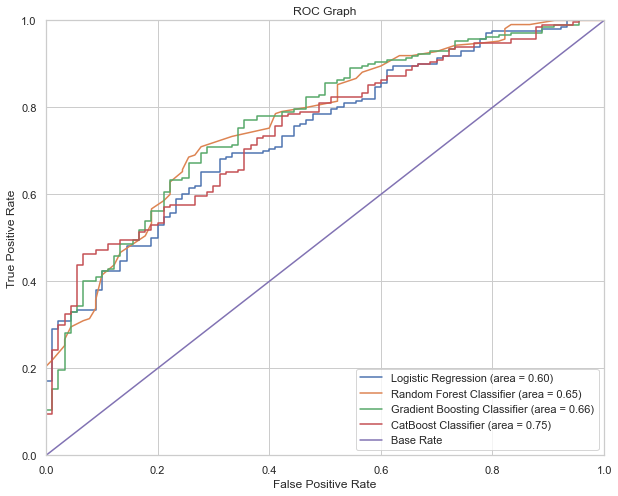

In [56]:
# create ROC graph
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, GB.predict_proba(X_test)[:,1])
cb_fpr, cb_tpr, cb_thresholds = roc_curve(y_test, cb.predict_proba(X_test_cb)[:,1])

plt.figure(figsize = (10,8))

# plot Logistic Regression ROC
plt.plot(fpr,tpr, label = 'Logistic Regression (area = %0.2f)' % lr_auc)

# plot Random Forest ROC
plt.plot(rf_fpr,rf_tpr, label = 'Random Forest Classifier (area = %0.2f)' % RF_auc)

# plot Gradient Boosting ROC
plt.plot(gb_fpr,gb_tpr, label = 'Gradient Boosting Classifier (area = %0.2f)' % GB_auc)

# plot catBoost ROC
plt.plot(cb_fpr,cb_tpr, label = 'CatBoost Classifier (area = %0.2f)' % cb_auc)

# plot base rate ROC
plt.plot([0,1], [0,1], label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc = 'lower right')

plt.show()

CatBoost has the best AUC value compared to other models.

### Confusion matrix of CatBoost

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_cb, cb.predict(X_test_cb))

array([[ 29,  61],
       [ 21, 189]], dtype=int64)

<img src="confusion_matrix.png" width=500 height=500 />

29 records has been predicted right as true good risk applicants and 189 has been predicted correct as bad risk applicants.